In [2]:
import pandas as pd
marathon_2015_2017 = pd.read_csv("marathon_2015_2017.csv")
marathon_2015_2017.head(2)

,Name,Age,M/F,City,State,Country,5K,10K,15K,20K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,883,1783,2697,3629,...,4567,5520,6479,7359,296,7757,1,1,1,2015
1,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,883,1783,2698,3628,...,4567,5519,6479,7362,298,7788,2,2,2,2015


In [3]:
import matplotlib.pyplot as plt

In [4]:
plt.figure(figsize=(7,7))   # 차트의 크기설정

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

In [5]:
# 남녀 참가자의 비율
m = marathon_2015_2017['M/F'].value_counts()
m

M    43482
F    36156
Name: M/F, dtype: int64

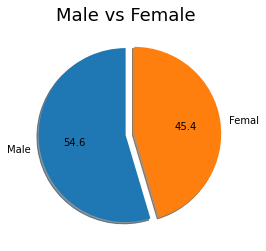

In [8]:
plt.title("Male vs Female", fontsize=18)  # 차트의 제목
# 차트에 표시될 각 구성의 제목들
lab = 'Male','Femal'
# 차트에 표시될 데이터들의 순서는 값이 큰값들 부터 작은 값으로 표시됩니다.
# 각 데이터들의 값들의 위치는 회전으로 조절하고 순서에 맞게 라벨을 배치합니다
exp = (0, 0.1)
plt.pie( m, labels=lab , startangle=90, autopct='%.1f', explode=exp, shadow=True)
# startangle : 화면에 표시되기전 회전 각도
# autopct : 자동 비율변환 & 출력 양식 설정
# explode : 각 구성요소중 강조하고자하는 조각을 얼만큼 빼내어서 표시할지에 대한 
#          설정(데이터 갯수 만큼 설정)
# shadow : 그림자 설정
plt.show()

#### 연습 문제
* Age 컬럼을 기준으로 Lev4 컬럼(연령대)을 새로 생성하고, 이 값을 바탕으로 Pie 차트를 생성하세요

* 작성 조건
1. 각 연령대 는 20대이하, 30대, 40대, 50이상    이렇게 네개 값으로 구성하세요
2. Lev4 컬럼을 생성할때는 apply lambda 또는 연산 등을 사용하세요
3. 회전은 90도, 출력형식은 소수점 2자리까지, 가장 인원이 많은 조각만 0.1 만큼 때네서 표현해주세요
4. 그림자 효과 넣어 주세요
5. 차트 제목은 "연령대별 참가자"
6. 각 조각에 라벨을 넣어 주세요

In [9]:
# 한글 폰트 설정 
plt.rc("font", family="Malgun Gothic")
# 폰트가 선명하게 보이도록 retina 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [10]:
marathon_2015_2017['lev4'] \
    = marathon_2015_2017['Age'].apply( \
        lambda x : '20 대이하' if x<=29 else 
                   ('30대' if x <= 39 else    
                   ('40대' if x <= 49 else '50대 이상')  )  )

In [14]:
m = marathon_2015_2017['lev4'].value_counts()
m

40대       25003
50대 이상    22298
30대       19796
20 대이하    12541
Name: lev4, dtype: int64

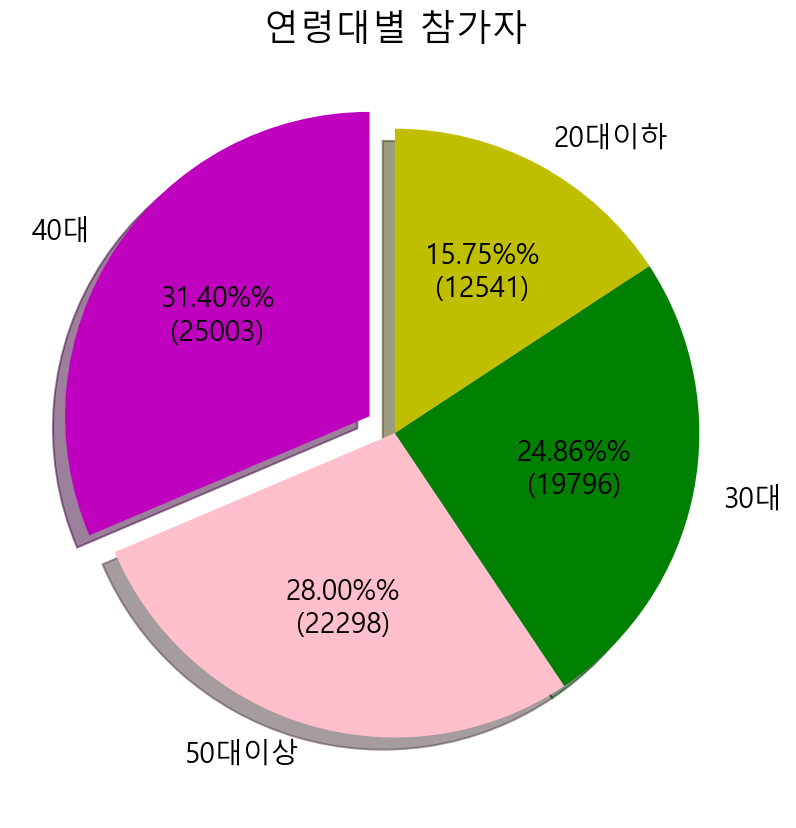

In [17]:
def my_fmt(x):
    return '{:.2f}%%\n({:.0f})'.format(x, len(marathon_2015_2017)*x/100)

# len(marathon_2015_2017) : 데이터프레임의 데이터 건수
# x/100 : 백분율값을 100으로 나눈 비율을 건수에 곱하여 실제 값을 얻습니다

lab = '40대', '50대이상', '30대', '20대이하'
plt.figure(figsize=(7,7))
exp = (0.1, 0, 0, 0)
plt.pie(m, labels=lab, autopct=my_fmt, \
        colors=['m','pink','g','y'], 
        explode=exp, shadow=True, startangle = 90, textprops={'fontsize': 14})
plt.title("연령대별 참가자",fontsize=18)
plt.show()